### Importing Libraries

This block imports all the necessary Python libraries for data manipulation, visualization, preprocessing, and building classification models. It includes:
- **NumPy & Pandas** for numerical and tabular data handling,
- **Matplotlib** for plotting,
- **Scikit-learn** modules for model training, evaluation, preprocessing, and classification algorithms.

In [1]:
# import nessecary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('cancer patient data set.csv')

### Exploratory Data Analysis (EDA)

In this section, we explore the dataset to gain initial insights. This includes examining data types, checking for missing values, analyzing feature distributions, and identifying relationships between variables. EDA helps in understanding the underlying structure of the data before applying machine learning models.

In [3]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [4]:
df.shape

(1000, 24)

In [5]:
df['Gender'].unique()

array([1, 2], dtype=int64)

In [6]:
df['Gender'].replace({2:1,1:0},inplace=True)

In [7]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Level'].value_counts()

Level
3    365
2    332
1    303
Name: count, dtype: int64

In [9]:
# proffisional visualize
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

### Data Visualization

This section is dedicated to exploring and understanding the data through visualizations. It helps in identifying patterns, distributions, correlations, and potential outliers, which are crucial for making informed decisions during preprocessing and modeling.

([<matplotlib.patches.Wedge at 0x1e8363bb350>,
 [Text(0.4526657644288495, 1.0025436178611111, '3'),
  Text(-1.0791995648820205, -0.21290443668100884, '2'),
  Text(0.6381478911067832, -0.8959728059913233, '1')],
 [Text(0.2469085987793724, 0.5468419733787878, '36.50%'),
  Text(-0.5886543081174657, -0.11612969273509571, '33.20%'),
  Text(0.3480806678764271, -0.4887124396316308, '30.30%')])

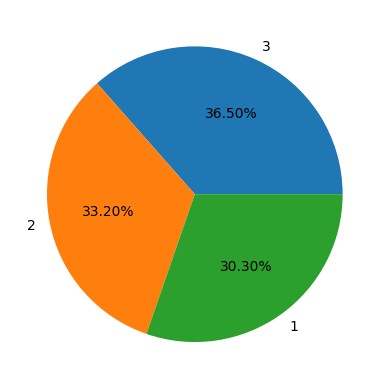

In [10]:
# with labels and percentage
plt.pie(df['Level'].value_counts(),labels=df['Level'].value_counts().index,autopct='%1.2f%%')

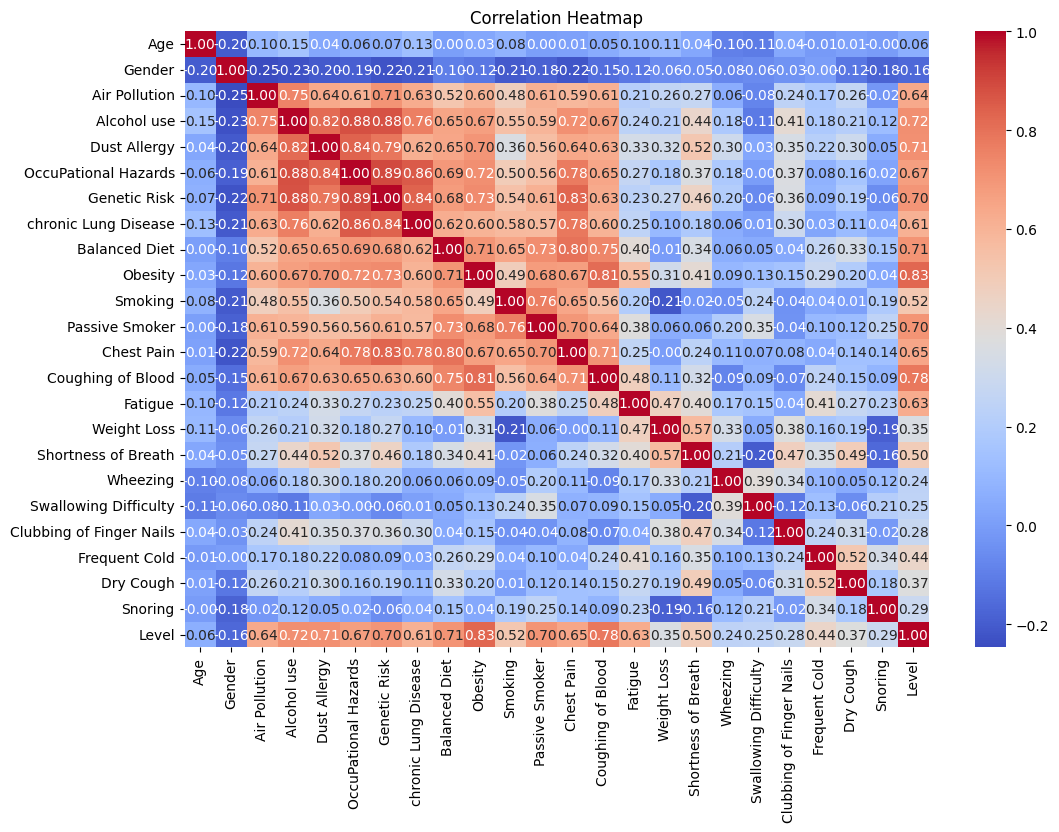

In [11]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

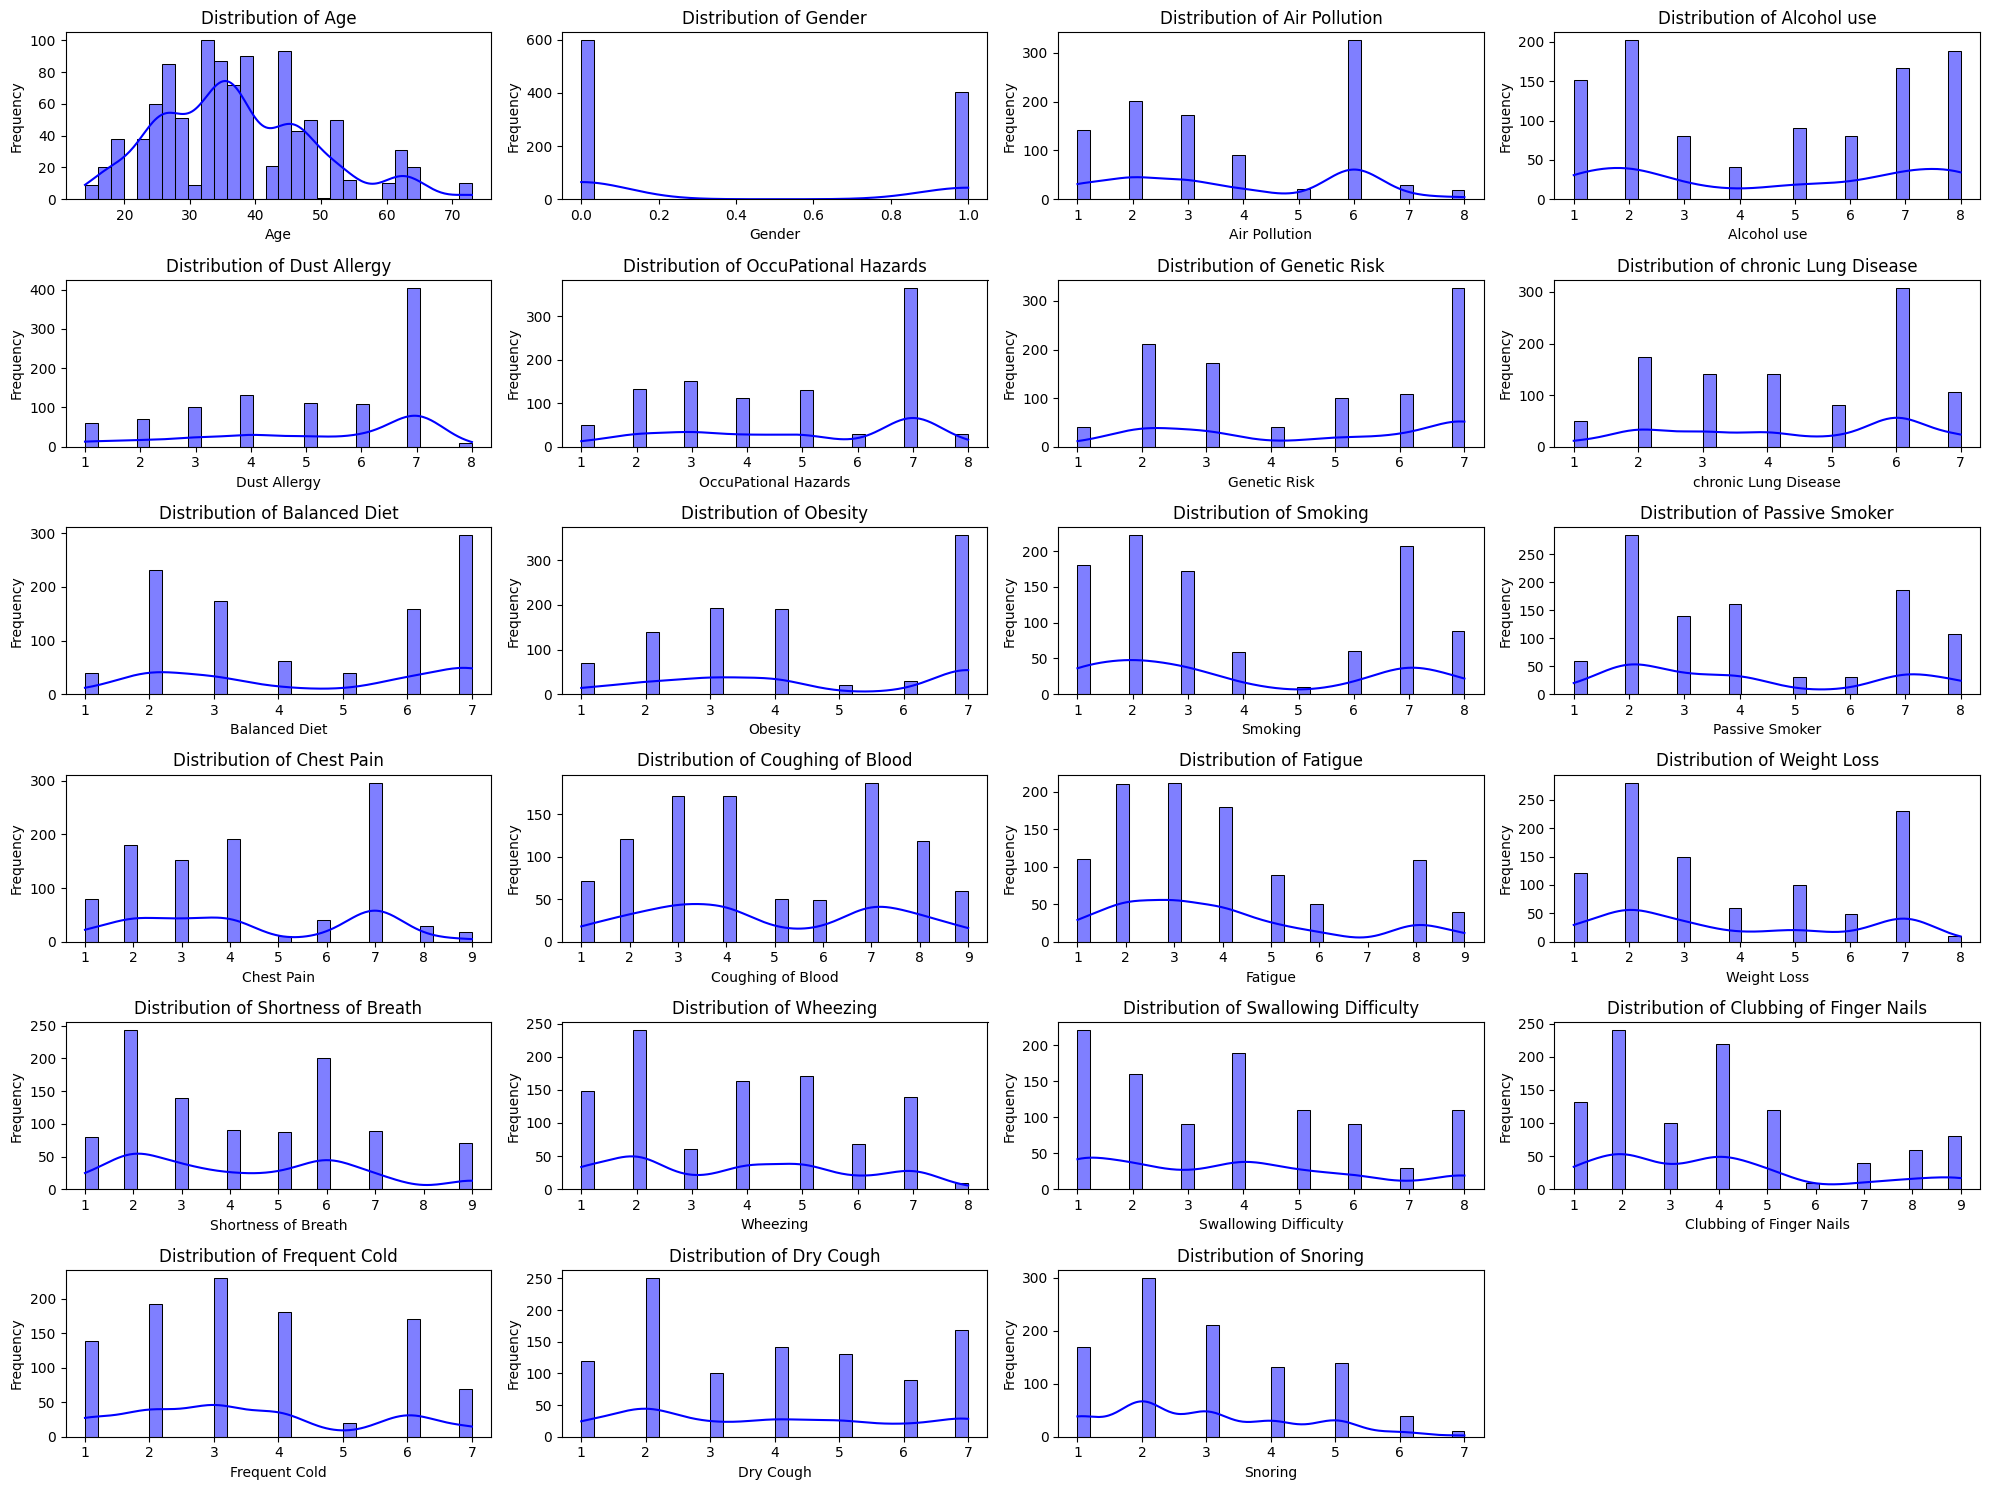

In [12]:
# Visualize feature distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the 'Level' column
    plt.subplot(6, 4, i)  # Adjust grid size based on the number of features
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Data Standardization

Standardization scales the features to have a mean of 0 and a standard deviation of 1. This step is essential for many machine learning algorithms (like SVM and KNN) that are sensitive to the scale of input data.

In [22]:
scaler = StandardScaler()
X = df.drop('Level', axis=1)
y = df['Level']
x=scaler.fit_transform(x)

###  **Train-Test Split**
Split the dataset into training and testing sets (80% train, 20% test).

In [23]:
# train & test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Build the Model

In this section, we define and train the machine learning model. Based on the preprocessed data, different classifiers like Logistic Regression, Decision Tree, Random Forest, etc., are implemented to evaluate their performance on the given task.

In [24]:
# dict with all classification models and advanced

models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':SVC(),
}

In [25]:
# train all models and check accurecy
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f'Accuracy score of {name} is {accuracy_score(y_test,y_pred)}')
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('='*50)
  print()

C:\Users\HP Elite BOOK\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of LogisticRegression is 1.0
[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy score of DecisionTreeClassifier is 1.0
[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy score of RandomForestClassifier is 1.0
[[55  0  0]
 [ 0 63  0

In [26]:
# choose best models from dict and suitable with dataset
model2 = SVC()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.965


In [27]:
# save model
import pickle
pickle.dump(model2,open('cancer.pkl','wb'))
# save scaler
pickle.dump(scaler,open('canserscaler.pkl','wb'))

In [28]:
filtered_df = df[df['Level'] == 1].sample()
list_of_samples = filtered_df.values.tolist()

print(list_of_samples)

[[28, 0, 6, 7, 8, 7, 6, 7, 7, 2, 4, 3, 7, 8, 2, 3, 6, 4, 2, 3, 1, 2, 1, 1]]


### Build System for Prediction from User Input

This section sets up the prediction system where the user can input data, and the model will provide predictions based on previously trained and saved models. The system loads the saved model, processes the user input, and generates an output accordingly. It demonstrates how to make real-time predictions with a trained machine learning model.

In [30]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

model = pickle.load(open('cancer.pkl', 'rb'))
scaler = pickle.load(open('canserscaler.pkl', 'rb'))

user_input = [[18, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 3, 4, 4, 1, 4, 1]] # removed target

# Convert the input to a numpy array and reshape it
user_input = np.array(user_input).reshape(1, -1)

# Scale the user input using the preloaded scaler
user_input_scaled = scaler.transform(user_input)

# Make prediction using the model
prediction = model.predict(user_input_scaled)

# Mapping the prediction to cancer severity level
level_mapping = {3: 'High', 1: 'Low', 2: 'Medium'}
predicted_level = level_mapping[prediction[0]]

print(f"Predicted Cancer Level for the random sample: {predicted_level}")


Predicted Cancer Level for the random sample: Low


C:\Users\HP Elite BOOK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
